# Token classification


# Installing Libraries


In [3]:
%%capture
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m pip install scispacy

# Importing Libraries

In [4]:
import pandas as pd
import spacy
from spacy.matcher import PhraseMatcher

# Loading the Pre-Trained model

In [5]:
nlp = spacy.load("en_core_web_sm")

# Data processing

In [6]:
phrases = ["alkaline phosphatase", "bone"]

matcher = PhraseMatcher(nlp.vocab)
for phrase in phrases:
    matcher.add(phrase, None, nlp(phrase))

# Function to extract entities using rule-based labeling
def extract_entities(text):
    doc = nlp(text)
    matches = matcher(doc)
    entities = [doc[start:end].text for _, start, end in matches]
    return entities

# Loading dataset

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/smoking dataset.csv')

# Data preprocessing

In [10]:
def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]
    return tokens

df['tokenized_text'] = df['TEXT'].apply(tokenize_text)
print(df[['TEXT', 'tokenized_text']])

                                                  TEXT  \
0    977146916\nHLGMC\n2878891\n022690\n01/27/1997 ...   
1    026738007\nCMC\n15319689\n3/25/1998 12:00:00 A...   
2    071962960\nBH\n4236518\n417454\n12/10/2001 12:...   
3    418520250\nNVH\n61562872\n3/11/1995 12:00:00 A...   
4    301443520\nCTMC\n49020928\n448922\n1/11/1990 1...   
..                                                 ...   
393  917989835 RWH\n5427551\n405831\n9660879\n01/09...   
394  817406016 RWH\n3154334\n554691\n3547577\n7/6/2...   
395  517502848 ELMVH\n18587541\n6634152\n12/12/2004...   
396  895872725 ELMVH\n99080881\n979718\n5/25/2002 1...   
397  305757070 ELMVH\n74973293\n2973118\n11/27/2003...   

                                        tokenized_text  
0    [977146916, \n, hlgmc, \n, 2878891, \n, 022690...  
1    [026738007, \n, cmc, \n, 15319689, \n, 3/25/19...  
2    [071962960, \n, bh, \n, 4236518, \n, 417454, \...  
3    [418520250, \n, nvh, \n, 61562872, \n, 3/11/19...  
4    [301443520, \

In [11]:
phrases = ["alkaline phosphatase", "bone"]
matcher = PhraseMatcher(nlp.vocab)
for phrase in phrases:
    matcher.add(phrase, None, nlp(phrase))

# Function to extract entities using rule-based labeling
def extract_entities(tokens):
    text = " ".join(tokens)
    doc = nlp(text)
    matches = matcher(doc)
    entities = [doc[start:end].text for _, start, end in matches]
    return entities

df['extracted_entities'] = df['tokenized_text'].apply(extract_entities)
print(df['extracted_entities'])

0      [alkaline phosphatase]
1                          []
2                          []
3                          []
4                          []
                ...          
393                        []
394                        []
395                        []
396                        []
397                        []
Name: extracted_entities, Length: 398, dtype: object


In [12]:
# Removing Rows with empty 'extracted_entities' column
df_filtered = df[df['extracted_entities'].apply(lambda x: len(x) > 0)]
print('Removing Null values:\n',df_filtered['extracted_entities'],end='\n\n')

# Filtering out rows with min. two labels in 'extracted_entities' column
df_filtered_two_labels = df_filtered[df_filtered['extracted_entities'].apply(lambda x: len(x)>1)]
print('Data with min. of 2 entities:\n',df_filtered_two_labels['extracted_entities'])

Removing Null values:
 0                                 [alkaline phosphatase]
6                                                 [bone]
8                                                 [bone]
18     [alkaline phosphatase, bone, alkaline phosphat...
20                                [alkaline phosphatase]
                             ...                        
277                               [alkaline phosphatase]
295                               [alkaline phosphatase]
297                               [alkaline phosphatase]
308                               [alkaline phosphatase]
350                                               [bone]
Name: extracted_entities, Length: 67, dtype: object

Data with min. of 2 entities:
 18     [alkaline phosphatase, bone, alkaline phosphat...
23                                          [bone, bone]
29        [bone, bone, bone, alkaline phosphatase, bone]
33                                          [bone, bone]
49     [bone, alkaline phosphatase, bo

In [20]:
# Filtering rows containing both entities
indices_with_both_entities = []

for index, row in df.iterrows():
    if 'alkaline phosphatase' in row['extracted_entities'] and 'bone' in row['extracted_entities']:
        indices_with_both_entities.append(index)

df_filtered_both = df.loc[indices_with_both_entities]
print(df_filtered_both['extracted_entities'])
print(len(df_filtered_both))

df_filtered_both


18     [alkaline phosphatase, bone, alkaline phosphat...
29        [bone, bone, bone, alkaline phosphatase, bone]
49     [bone, alkaline phosphatase, bone, bone, alkal...
57     [bone, bone, bone, bone, bone, bone, alkaline ...
88     [bone, alkaline phosphatase, bone, bone, bone,...
115                         [alkaline phosphatase, bone]
157                   [bone, bone, alkaline phosphatase]
173                         [bone, alkaline phosphatase]
198                   [bone, bone, alkaline phosphatase]
227             [bone, alkaline phosphatase, bone, bone]
Name: extracted_entities, dtype: object
10


,ID,STATUS,TEXT,tokenized_text,extracted_entities
18,710,NON-SMOKER,910458031\nNVH\n23238893\n1/12/1991 12:00:00 A...,"[910458031, \n, nvh, \n, 23238893, \n, 1/12/19...","[alkaline phosphatase, bone, alkaline phosphat..."
29,799,NON-SMOKER,857888116\nCTMC\n36320247\n6680133\nNew Years ...,"[857888116, \n, ctmc, \n, 36320247, \n, 668013...","[bone, bone, bone, alkaline phosphatase, bone]"
49,573,NON-SMOKER,534644131\nFIH\n9393835\n24529/65a4\n204379\n4...,"[534644131, \n, fih, \n, 9393835, \n, 24529/65...","[bone, alkaline phosphatase, bone, bone, alkal..."
57,627,NON-SMOKER,425093222\nPRGH\n74052207\n446315\n3/14/1998 1...,"[425093222, \n, prgh, \n, 74052207, \n, 446315...","[bone, bone, bone, bone, bone, bone, alkaline ..."
88,541,SMOKER,356529973\nFIH\n2102647\n73383/3545\n791416\n1...,"[356529973, \n, fih, \n, 2102647, \n, 73383/35...","[bone, alkaline phosphatase, bone, bone, bone,..."
115,715,UNKNOWN,596437842\nCTMC\n63056604\n547591\n02/08/1991 ...,"[596437842, \n, ctmc, \n, 63056604, \n, 547591...","[alkaline phosphatase, bone]"
157,814,UNKNOWN,385215362\nCTMC\n47531332\n8504886\n11/17/2003...,"[385215362, \n, ctmc, \n, 47531332, \n, 850488...","[bone, bone, alkaline phosphatase]"
173,854,UNKNOWN,920798564\nCTMC\n70160673\n840502\n3/3/1999 12...,"[920798564, \n, ctmc, \n, 70160673, \n, 840502...","[bone, alkaline phosphatase]"
198,920,UNKNOWN,448099088\nGH\n32371118\n2/1/2002 12:00:00 AM\...,"[448099088, \n, gh, \n, 32371118, \n, 2/1/2002...","[bone, bone, alkaline phosphatase]"
227,569,UNKNOWN,522222575\nFIH\n2197819\n73072/3686\n877333\n8...,"[522222575, \n, fih, \n, 2197819, \n, 73072/36...","[bone, alkaline phosphatase, bone, bone]"


# Rule based Relation extraction

In [21]:
def check_relation(text):
    doc = nlp(text)
    ap_value = None
    bone_present = False
    for ent in doc.ents:
        if ent.text == "alkaline phosphatase":
            # Extract value of alkaline phosphatase
            for token in ent.subtree:
                if token.like_num:
                    ap_value = float(token.text)
        elif ent.text == "bone":
            bone_present = True
    relation_exists = bone_present and ap_value is not None
    return relation_exists


In [22]:
df_filtered_both['relation_exists'] = df_filtered_both['TEXT'].apply(check_relation)
print(df_filtered_both)

      ID      STATUS                                               TEXT  \
18   710  NON-SMOKER  910458031\nNVH\n23238893\n1/12/1991 12:00:00 A...   
29   799  NON-SMOKER  857888116\nCTMC\n36320247\n6680133\nNew Years ...   
49   573  NON-SMOKER  534644131\nFIH\n9393835\n24529/65a4\n204379\n4...   
57   627  NON-SMOKER  425093222\nPRGH\n74052207\n446315\n3/14/1998 1...   
88   541      SMOKER  356529973\nFIH\n2102647\n73383/3545\n791416\n1...   
115  715     UNKNOWN  596437842\nCTMC\n63056604\n547591\n02/08/1991 ...   
157  814     UNKNOWN  385215362\nCTMC\n47531332\n8504886\n11/17/2003...   
173  854     UNKNOWN  920798564\nCTMC\n70160673\n840502\n3/3/1999 12...   
198  920     UNKNOWN  448099088\nGH\n32371118\n2/1/2002 12:00:00 AM\...   
227  569     UNKNOWN  522222575\nFIH\n2197819\n73072/3686\n877333\n8...   

                                        tokenized_text  \
18   [910458031, \n, nvh, \n, 23238893, \n, 1/12/19...   
29   [857888116, \n, ctmc, \n, 36320247, \n, 668013...   


In [35]:
pattern = [{'LOWER': 'alkaline'}, {'LOWER': 'phosphatase'}]

def extract_alp_value(text):
    alp_values = []
    doc = nlp(text)
    matcher = Matcher(nlp.vocab)
    matcher.add("ALP_VALUE", [pattern])
    matches = matcher(doc)
    for match_id, start, end in matches:
        alp_text = doc[end].text
        if alp_text.isdigit():
            alp_values.append(float(alp_text))
    return alp_values

df_filtered_both['alp_values'] = df_filtered_both['TEXT'].apply(extract_alp_value)
print(df_filtered_both)

      ID      STATUS                                               TEXT  \
18   710  NON-SMOKER  910458031\nNVH\n23238893\n1/12/1991 12:00:00 A...   
29   799  NON-SMOKER  857888116\nCTMC\n36320247\n6680133\nNew Years ...   
49   573  NON-SMOKER  534644131\nFIH\n9393835\n24529/65a4\n204379\n4...   
57   627  NON-SMOKER  425093222\nPRGH\n74052207\n446315\n3/14/1998 1...   
88   541      SMOKER  356529973\nFIH\n2102647\n73383/3545\n791416\n1...   
115  715     UNKNOWN  596437842\nCTMC\n63056604\n547591\n02/08/1991 ...   
157  814     UNKNOWN  385215362\nCTMC\n47531332\n8504886\n11/17/2003...   
173  854     UNKNOWN  920798564\nCTMC\n70160673\n840502\n3/3/1999 12...   
198  920     UNKNOWN  448099088\nGH\n32371118\n2/1/2002 12:00:00 AM\...   
227  569     UNKNOWN  522222575\nFIH\n2197819\n73072/3686\n877333\n8...   

                                        tokenized_text  \
18   [910458031, \n, nvh, \n, 23238893, \n, 1/12/19...   
29   [857888116, \n, ctmc, \n, 36320247, \n, 668013...   


In [36]:
import re

def extract_context(text):
    # Find all occurrences of "bone" and "alkaline phosphatase" in the text
    matches = re.finditer(r'\bbone\b|\balkaline phosphatase\b', text, re.IGNORECASE)
    results = []
    for match in matches:
        start_idx = max(0, match.start() - 30)  # Start index of the context window
        end_idx = min(len(text), match.end() + 30)  # End index of the context window
        context = text[start_idx:end_idx]
        results.append(context)
    return results

df_filtered_both['context'] = df_filtered_both['TEXT'].apply(extract_context)
print(df_filtered_both[['ID', 'context']])

      ID                                            context
18   710  [0 , direct bilirubin of 2.0 .\nAlkaline phosp...
29   799  [0:00 AM\nLEUKEMIA , PNUEMOIA , BONE MARROW TR...
49   573  [\n1. Pulmonary and right iliac bone metastase...
57   627  [eived five units of blood .\nA bone marrow bi...
88   541  [sis , history of depression , bone pain , ano...
115  715  [, AST was 156 , LDH was 336 , alkaline phosph...
157  814  [mber , 2002 .\nThe patient had bone marrow bi...
173  854  [eight loss .\nNo headache .\nNo bone pain .\n...
198  920  [y .\n4. Urinary retention .\n5. Bone marrow t...
227  569  [astic changes around L3 .\nThe bone marrow bi...


In [37]:
for index, row in df_filtered_both.iterrows():
    print("ID:", row['ID'])
    print("Context:")
    for i, context in enumerate(row['context']):
        print(f"Context {i + 1}: {' '.join(context)}")
    print()

ID: 710
Context:
Context 1: 0   ,   d i r e c t   b i l i r u b i n   o f   2 . 0   . 
 A l k a l i n e   p h o s p h a t a s e   1 1 4 8   . 
 L D H   8 0 6   . 
 C a l c i u m   1 1 . 8
Context 2: o l a t e d   s p l e n i c   m e t a s t a s e s   . 
 A   b o n e   s c a n   r e v e a l e d   i n c r e a s e d   u p t a k
Context 3: a s   8 9   . 
 H e r   L D H   w a s   3 9 4   . 
 H e r   a l k a l i n e   p h o s p h a t a s e   w a s   1 5 1 4   . 
 T o t a l   b i l i r u b i n   w a

ID: 799
Context:
Context 1: 0 : 0 0   A M 
 L E U K E M I A   ,   P N U E M O I A   ,   B O N E   M A R R O W   T R A N S P L A N T 
 S i g n e d 
 D I S 

Context 2: l i c   a c i d   . 
 I n   A u g u s t   2 0 0 2   ,   a   b o n e   m a r r o w   b i o p s y   s h o w e d   M D S   w i t h
Context 3: b l a s t s   . 
 I n   N o v e m b e r   2 0 0 5   ,   a   b o n e   m a r r o w   b i o p s y   s h o w e d   8 0 %   c e l l
Context 4: L T   2 0   ,   A S T   o f   2 7   ,   L D H   1 5 4   

# Word Cloud

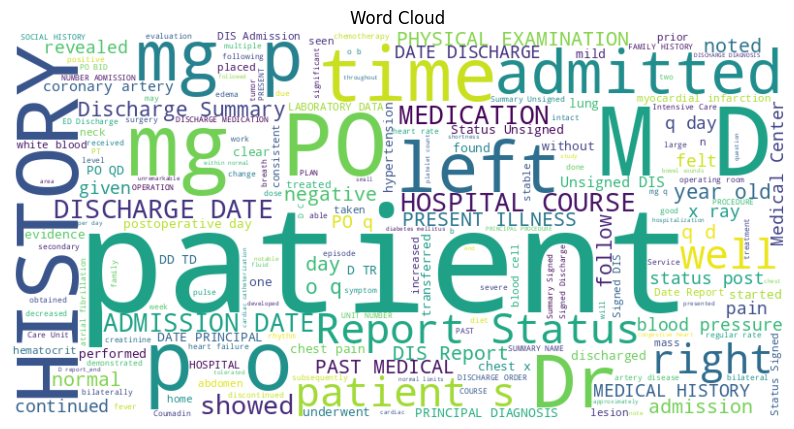

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['TEXT'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


# Word Embedding Visualization using Principal Component Analysis

In [46]:
import nltk
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenize your text data
tokenized_texts = [word_tokenize(text) for text in df['TEXT']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Get word embeddings
word_embeddings = word2vec_model.wv


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


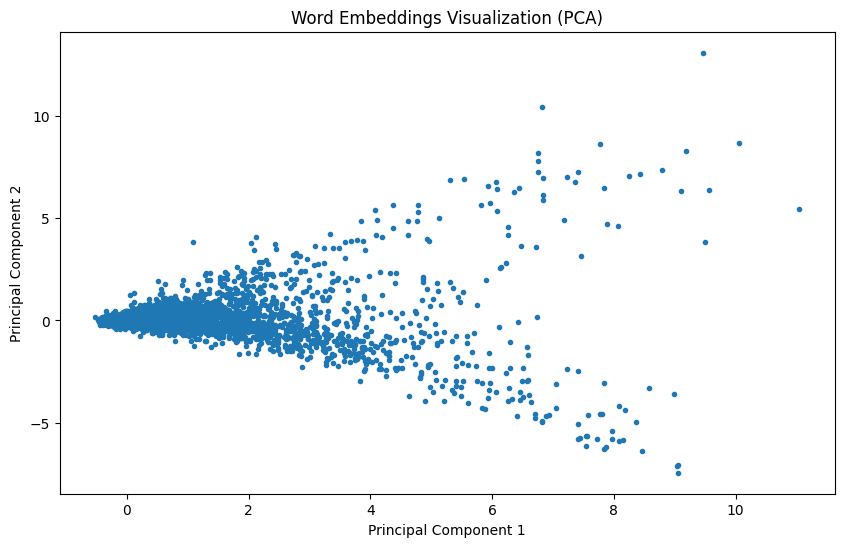

In [47]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Assuming word_embeddings is already defined or loaded correctly
word_vectors = [word_embeddings[word] for word in word_embeddings.index_to_key]
word_vectors_array = np.array(word_vectors)
pca = PCA(n_components=2)
word_embeddings_2d = pca.fit_transform(word_vectors_array)

plt.figure(figsize=(10, 6))
plt.scatter(word_embeddings_2d[:, 0], word_embeddings_2d[:, 1], marker='.')
plt.title('Word Embeddings Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
